In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score

In [ ]:
df=pd.read_csv('Churn_Modelling.csv')
df

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [17]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [21]:
df.duplicated().sum()

0

In [25]:
df['Surname'].unique()

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

In [27]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [26]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [32]:
x=df.drop(columns=['RowNumber','CustomerId','Surname','Exited'])
y=df['Exited']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
x=pd.get_dummies(x, columns=['Geography','Gender'], drop_first=True)

In [41]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [43]:
x.shape

(10000, 11)

In [45]:
y.shape

(10000,)

In [55]:
#1.linear regression
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3 , random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 11)
(3000, 11)
(7000,)
(3000,)


In [57]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [61]:
lin_pred = model.predict(x_test)
mse = mean_squared_error(y_test, lin_pred)
r2 = r2_score(y_test, lin_pred)

In [63]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.13304966316672895
R^2 Score: 0.1513150284486412


<Axes: ylabel='Exited'>

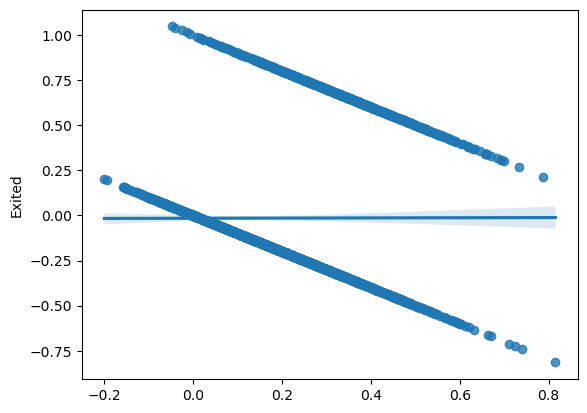

In [141]:
sns.regplot(x=lin_pred, y=y_test-lin_pred,data=df)

2.logestic regression

In [67]:
from sklearn.linear_model import LogisticRegression

In [69]:
logistic_model=LogisticRegression(max_iter= 7000, random_state=42)
logistic_model.fit(x_train,y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=7000, random_state=42)

In [71]:
log_pred=logistic_model.predict(x_test)
log_pred

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
accuracy= accuracy_score(y_test ,log_pred)
report= classification_report(y_test, log_pred)
conf_matrix= confusion_matrix(y_test, log_pred)

In [75]:
print(f'accuracy: {accuracy}')
print(f'report: {report}')
print(f'conf_matrix: {conf_matrix}')

accuracy: 0.8133333333333334
report:               precision    recall  f1-score   support

           0       0.83      0.96      0.89      2416
           1       0.55      0.21      0.30       584

    accuracy                           0.81      3000
   macro avg       0.69      0.58      0.60      3000
weighted avg       0.78      0.81      0.78      3000

conf_matrix: [[2318   98]
 [ 462  122]]


In [77]:
#3.desicion treee
from sklearn.tree import DecisionTreeClassifier

In [79]:
des_tree = DecisionTreeClassifier(random_state=42)
des_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [83]:
tree_pred = des_tree.predict(x_test)

In [85]:
accuracy = accuracy_score(y_test, tree_pred)
print(f'Accuracy Score: {accuracy:.4f}')

Accuracy Score: 0.8043


In [89]:
#4.random forest
from sklearn.ensemble import RandomForestClassifier

In [93]:
random_forest = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
random_forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [95]:
ran_pred = random_forest.predict(x_test)

In [97]:
accuracy = accuracy_score(y_test, ran_pred)
print(f'Accuracy Score: {accuracy:.4f}')

Accuracy Score: 0.8730


In [250]:
#5.adaboost
from sklearn.ensemble import AdaBoostClassifier

In [259]:
Ada_boost = AdaBoostClassifier(n_estimators=50,learning_rate=1, random_state=42)
Ada_boost.fit(x_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=1, random_state=42)

In [302]:
Ada_pred = Ada_boost.predict(x_test)
accuracy = accuracy_score(y_test, Ada_pred)
print(f'Accuracy Score: {accuracy:.4f}')

Accuracy Score: 0.8620


In [278]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 29.1 MB/s eta 0:00:00a 0:00:01


In [282]:
#6.xg boost
import xgboost as xgb

In [286]:
XG_boost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
XG_boost_model.fit(x_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:31:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [296]:
XG_pred = XG_boost_model.predict(x_test)
accuracy = accuracy_score(y_test, XG_pred)
print(f'Accuracy Score: {accuracy:.4f}')
print(classification_report(y_test, XG_pred))
print(confusion_matrix(y_test, XG_pred))

Accuracy Score: 0.8630
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2416
           1       0.72      0.49      0.58       584

    accuracy                           0.86      3000
   macro avg       0.80      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000

[[2304  112]
 [ 299  285]]


In [305]:
#7.KNN
from sklearn.neighbors import KNeighborsClassifier

In [307]:
knn_model = KNeighborsClassifier(n_neighbors=5)  
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [309]:
knn_pred = knn_model.predict(x_test)

accuracy = accuracy_score(y_test, knn_pred)
print(f'Accuracy Score: {accuracy:.4f}')
print(classification_report(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred))


Accuracy Score: 0.7707
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2416
           1       0.25      0.09      0.14       584

    accuracy                           0.77      3000
   macro avg       0.53      0.51      0.50      3000
weighted avg       0.70      0.77      0.73      3000

[[2258  158]
 [ 530   54]]


#8.Naive Bayes

In [133]:
from sklearn.naive_bayes import GaussianNB

In [135]:
Bayes_model = GaussianNB()
Bayes_model.fit(x_train, y_train)

GaussianNB()

In [137]:
bays_pred = Bayes_model.predict(x_test)

accuracy = accuracy_score(y_test, bays_pred)
print(f'Accuracy Score: {accuracy:.4f}')
print(classification_report(y_test, bays_pred))
print(confusion_matrix(y_test, bays_pred))

Accuracy Score: 0.7930
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      2416
           1       0.35      0.08      0.13       584

    accuracy                           0.79      3000
   macro avg       0.58      0.52      0.50      3000
weighted avg       0.72      0.79      0.74      3000

[[2334   82]
 [ 539   45]]


#9.SVM

In [118]:
from sklearn.svm import SVC

In [120]:
svc_model=SVC(kernel='linear')
svc_model.fit(x_train,y_train)

SVC(kernel='linear')

In [127]:
svc_pred=svc_model.predict(x_test)
accuracy=accuracy_score(y_test, svc_pred)

In [129]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.7913333333333333
